In [2]:
# import required libraries
import pandas as pd

In [3]:
# load the data
data = pd.read_json('/Users/nicholasgunawan/Library/CloudStorage/OneDrive-peter.petra.ac.id/KULIAH/SKRIPSI/code/Data/Preprocessed Data/kind:bug/merged_data.json')

# Display the first few rows of the dataframe
data.head()

,comments_url,id,title,body,issue_url,pr_url,labels,pr_number,filename,status,additions,deletions,changes
0,https://api.github.com/repos/kubernetes/kubern...,2639668210,kubelet crash: fatal error: concurrent map writes,### What happened?\n\nWhile looking into three...,https://github.com/kubernetes/kubernetes/issue...,https://github.com/kubernetes/kubernetes/pull/...,[area/kubelet],128657,"['pkg/kubelet/cm/container_manager_linux.go', ...","['modified', 'modified', 'modified', 'modified']","[3, 4, 18, 75]","[3, 3, 6, 0]","[6, 7, 24, 75]"
1,https://api.github.com/repos/kubernetes/kubern...,2617512099,[FG:InPlacePodVerticalScaling] failed to verif...,### What happened?\n\nOne line bug description...,https://github.com/kubernetes/kubernetes/issue...,https://github.com/kubernetes/kubernetes/pull/...,[area/kubelet],126620,"['pkg/kubelet/status/state/checkpoint.go', 'pk...","['modified', 'modified', 'added']","[42, 23, 166]","[26, 17, 0]","[68, 40, 166]"
2,https://api.github.com/repos/kubernetes/kubern...,2604613192,Restore build-tag flag for code-generator,### What happened?\n\nThe `build-tag` flag is ...,https://github.com/kubernetes/kubernetes/issue...,https://github.com/kubernetes/kubernetes/pull/...,[area/code-generation],128259,['staging/src/k8s.io/code-generator/cmd/conver...,"['modified', 'modified', 'modified', 'modified...","[12, 1, 1, 12, 1, 1]","[2, 1, 1, 1, 1, 1]","[14, 2, 2, 13, 2, 2]"
3,https://api.github.com/repos/kubernetes/kubern...,2596132738,[Failing Tests] ci-crio-cgroupv1-node-e2e-conf...,### Which jobs are failing?\n* master-blocking...,https://github.com/kubernetes/kubernetes/issue...,https://github.com/kubernetes/kubernetes/pull/...,"[area/kubeadm, area/dependency]",128175,"['go.mod', 'go.sum', 'hack/unwanted-dependenci...","['modified', 'modified', 'modified', 'modified...","[1, 3, 1, 21, 9, 9, 4, 0, 10, 2, 2, 5, 8, 1]","[1, 2, 0, 98, 8, 7, 6, 62, 11, 1, 4, 8, 11, 1]","[2, 5, 1, 119, 17, 16, 10, 62, 21, 3, 6, 13, 1..."
4,https://api.github.com/repos/kubernetes/kubern...,2591358936,Crash on kube manager's service-lb-controller ...,### What happened?\n\nIf kube manager is start...,https://github.com/kubernetes/kubernetes/issue...,https://github.com/kubernetes/kubernetes/pull/...,[area/cloudprovider],128182,['cmd/kube-controller-manager/app/controllerma...,"['modified', 'modified', 'modified']","[26, 12, 5]","[0, 1, 4]","[26, 13, 9]"


# Kubernetes Label Count Analysis

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Statistics about label counts

In [5]:
 # 1. Count the number of labels per issue
data['label_count'] = data['labels'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Display basic statistics about label counts
print("Label Count Statistics:")
print(data['label_count'].describe())

Label Count Statistics:
count    1258.000000
mean        1.510334
std         1.152068
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        13.000000
Name: label_count, dtype: float64


### Histogram of label counts


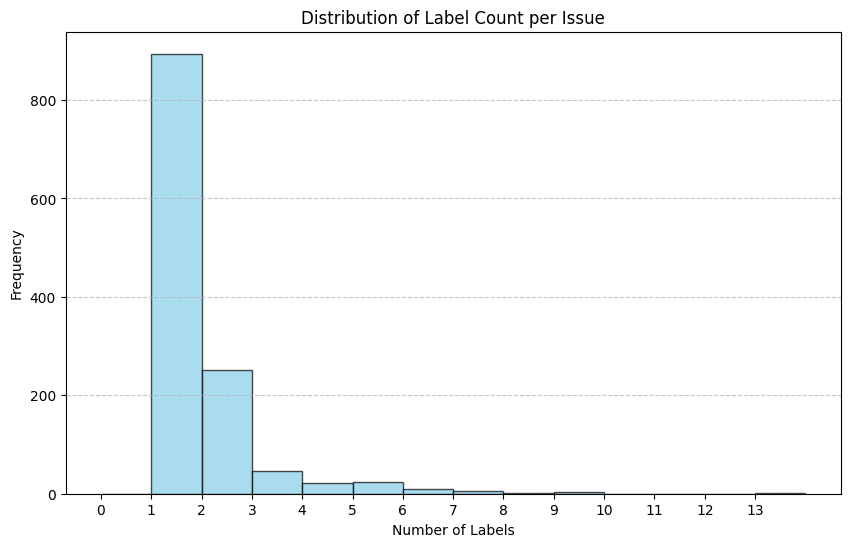

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(data['label_count'], bins=range(0, data['label_count'].max() + 2), alpha=0.7, 
            color='skyblue', edgecolor='black')
plt.title('Distribution of Label Count per Issue')
plt.xlabel('Number of Labels')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(0, data['label_count'].max() + 1))
plt.show()

## Univariate analysis on label distribution


### Count of each individual label

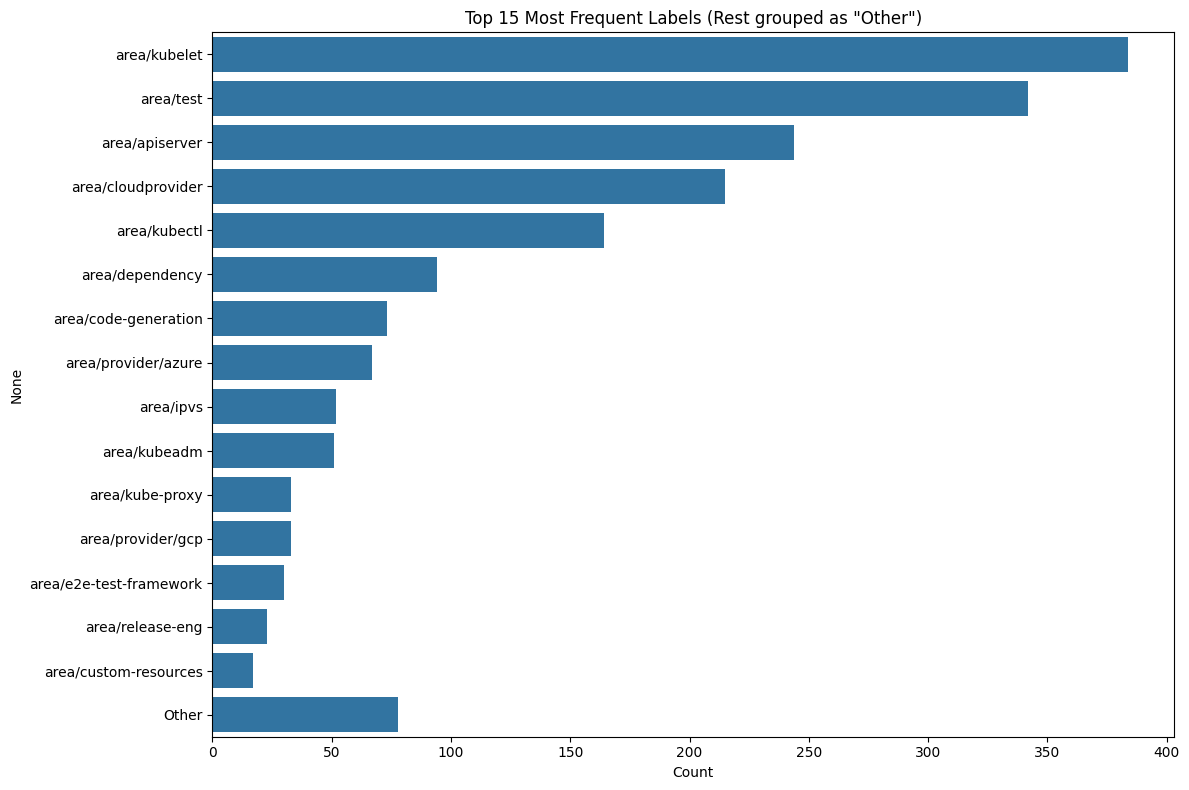

In [7]:
# Count of each individual label
all_labels = []
for labels in data['labels']:
    if isinstance(labels, list):
        all_labels.extend(labels)

label_counts = pd.Series(all_labels).value_counts()

# Get the top N labels and group the rest as "Other"
top_n = 15  # Show top 15 most frequent labels
top_labels = label_counts.head(top_n)
other_count = label_counts[top_n:].sum()

# Create a new series with "Other" category
plot_labels = top_labels.copy()
plot_labels["Other"] = other_count

# Display the most common labels with "Other" category
plt.figure(figsize=(12, 8))
sns.barplot(x=plot_labels.values, y=plot_labels.index)
plt.title(f'Top {top_n} Most Frequent Labels (Rest grouped as "Other")')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

### Pie chart for label distribution


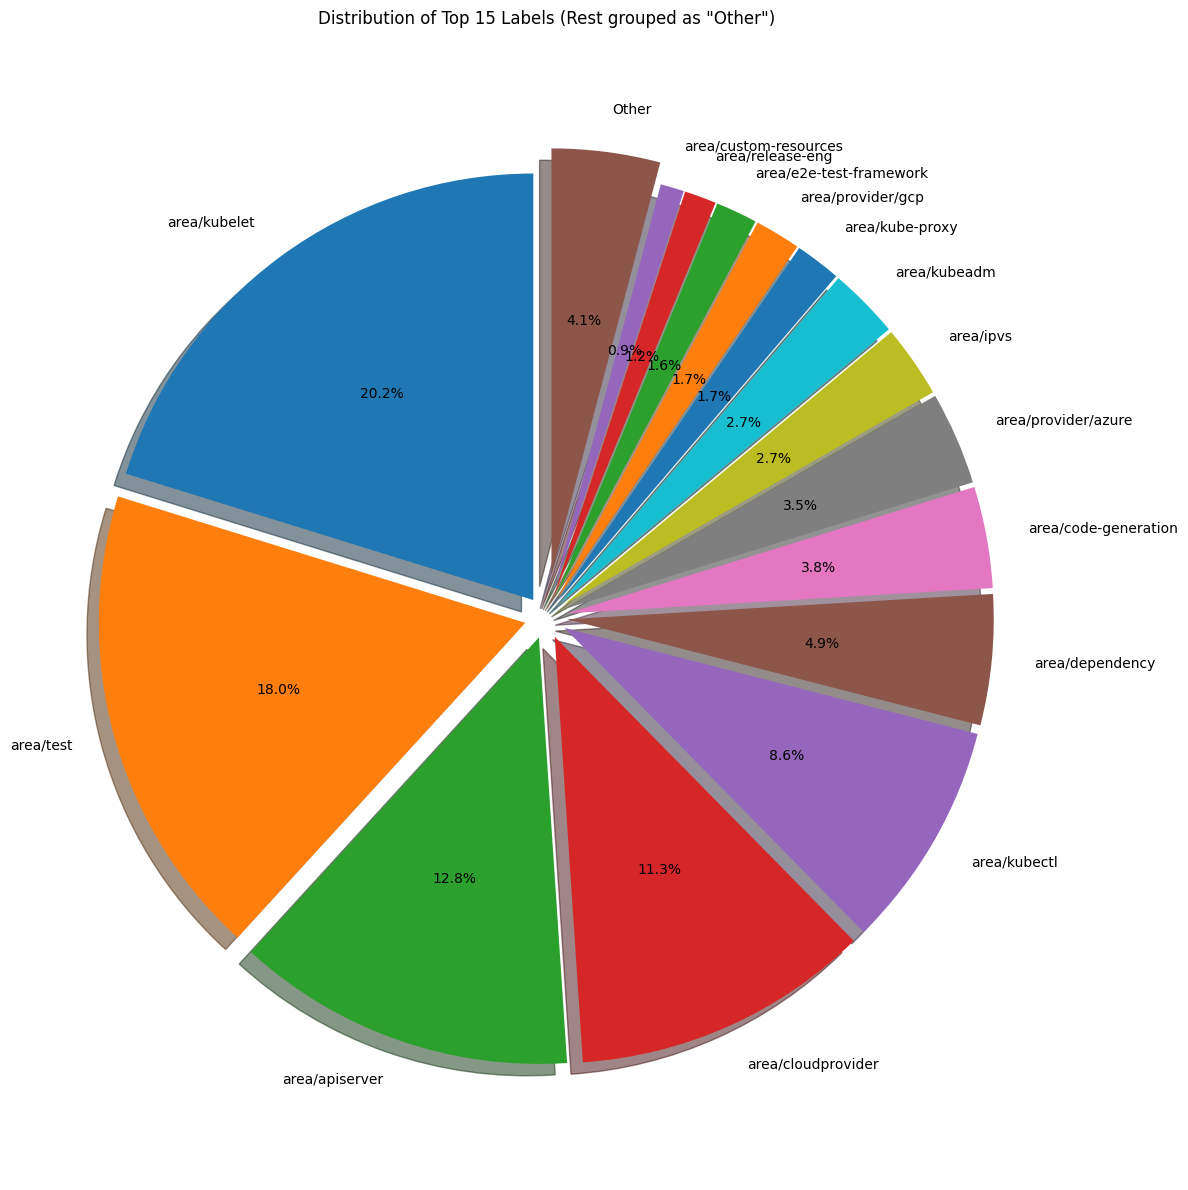

In [8]:
# Pie chart for label distribution with "Other" category
plt.figure(figsize=(12, 12))
plt.pie(plot_labels.values, labels=plot_labels.index, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=[0.05] * (top_n) + [0.1])  # Explode the "Other" slice slightly more
plt.axis('equal')
plt.title(f'Distribution of Top {top_n} Labels (Rest grouped as "Other")')
plt.tight_layout()
plt.show()

### Label count distribution


In [9]:
# Display label count distribution in a table
label_count_dist = data['label_count'].value_counts().sort_index()
label_count_percentage = (label_count_dist / len(data) * 100).round(2)

label_dist_df = pd.DataFrame({
    'Count': label_count_dist,
    'Percentage (%)': label_count_percentage
})

print("\nLabel Count Distribution:")
display(label_dist_df)


Label Count Distribution:


,Count,Percentage (%)
label_count,,
1,894,71.07
2,251,19.95
3,46,3.66
4,22,1.75
5,23,1.83
6,10,0.79
7,6,0.48
8,1,0.08
9,3,0.24


## File Changed Analysis

In [10]:
# Check a sample of what the filename data looks like
print("Sample of filename column data:")
print(data['filename'].iloc[0])
print(type(data['filename'].iloc[0]))

# If the file data is stored as a string representation of a list, we need to convert it
# For example, if it's like "['file1.go', 'file2.go']" instead of an actual list

# Let's see if we need to convert the data
sample = data['filename'].iloc[0]
needs_conversion = isinstance(sample, str) and sample.startswith('[') and sample.endswith(']')

if needs_conversion:
    print("\nDetected string representation of list. Converting...")
    
    # Define a conversion function that handles potential format issues
    import ast
    
    def safe_convert_to_list(file_str):
        if isinstance(file_str, list):
            return file_str
        elif isinstance(file_str, str):
            if file_str.startswith('[') and file_str.endswith(']'):
                try:
                    # Try to use ast.literal_eval which is safer than eval
                    return ast.literal_eval(file_str)
                except:
                    # If that fails, try a simple string split (assuming comma separated)
                    file_str = file_str[1:-1]  # Remove [] brackets
                    return [f.strip().strip("'\"") for f in file_str.split(',')]
            return []
        else:
            return []
    
    # Apply the conversion
    data['filename'] = data['filename'].apply(safe_convert_to_list)
    
    print("Conversion complete. Sample of converted data:")
    print(data['filename'].iloc[0])
    print(type(data['filename'].iloc[0]))

Sample of filename column data:
['pkg/kubelet/cm/container_manager_linux.go', 'pkg/kubelet/cm/container_manager_windows.go', 'pkg/kubelet/cm/containermap/container_map.go', 'pkg/kubelet/cm/containermap/container_map_test.go']
<class 'str'>

Detected string representation of list. Converting...
Conversion complete. Sample of converted data:
['pkg/kubelet/cm/container_manager_linux.go', 'pkg/kubelet/cm/container_manager_windows.go', 'pkg/kubelet/cm/containermap/container_map.go', 'pkg/kubelet/cm/containermap/container_map_test.go']
<class 'list'>


### Basic File Change Statistics


In [11]:
# Calculate file counts with the correctly parsed data
file_column = 'filename'  

# Add a count of files changed per issue
data['files_changed_count'] = data[file_column].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Display basic statistics
print("Files Changed Statistics (Corrected):")
print(data['files_changed_count'].describe())

Files Changed Statistics (Corrected):
count    1258.000000
mean        5.470588
std         7.248483
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        30.000000
Name: files_changed_count, dtype: float64


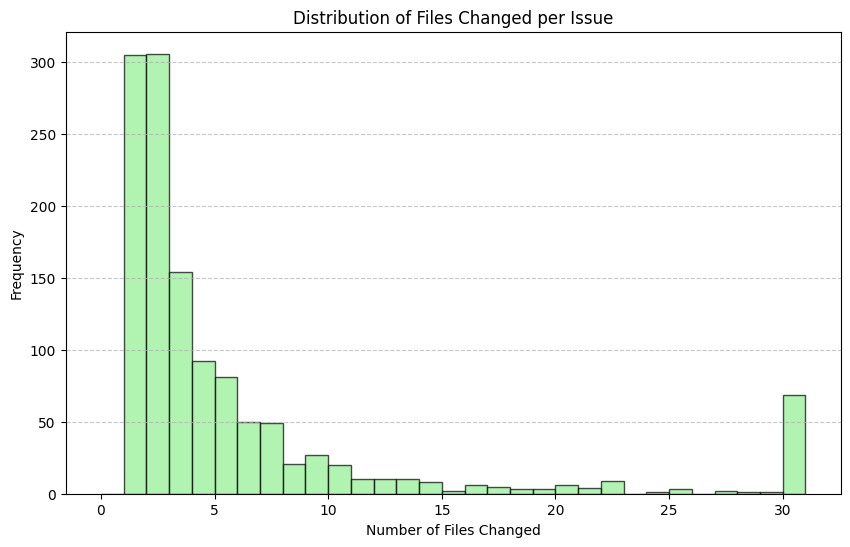

In [12]:
# Create histogram of files changed counts
plt.figure(figsize=(10, 6))
plt.hist(data['files_changed_count'], bins=range(0, min(50, data['files_changed_count'].max() + 2)), 
         alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribution of Files Changed per Issue')
plt.xlabel('Number of Files Changed')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(0, min(50, data['files_changed_count'].max() + 1), 5))
plt.show()

### Files Changed by Area Label
This analysis shows how many files are changed on average for issues with different area labels.


In [13]:
# Create a dictionary to store files changed per area
area_files = {}
area_issue_counts = {}

# Iterate through each issue
for idx, row in data.iterrows():
    if not isinstance(row['labels'], list) or not isinstance(row[file_column], list):
        continue
        
    # Filter for area labels (those starting with 'area/')
    area_labels = [label for label in row['labels'] if label.startswith('area/')]
    
    # If no area labels, categorize as "no-area"
    if not area_labels:
        area = "no-area"
        if area not in area_files:
            area_files[area] = []
            area_issue_counts[area] = 0
        area_files[area].append(len(row[file_column]))
        area_issue_counts[area] += 1
    else:
        # Count for each area label
        for area in area_labels:
            if area not in area_files:
                area_files[area] = []
                area_issue_counts[area] = 0
            area_files[area].append(len(row[file_column]))
            area_issue_counts[area] += 1

# Create a dataframe for analysis
area_files_df = pd.DataFrame({
    'Area': list(area_files.keys()),
    'Issue_Count': [area_issue_counts[area] for area in area_files.keys()],
    'Avg_Files_Changed': [np.mean(files) for files in area_files.values()],
    'Median_Files_Changed': [np.median(files) for files in area_files.values()],
    'Max_Files_Changed': [max(files) if files else 0 for files in area_files.values()],
    'Total_Files_Changed': [sum(files) for files in area_files.values()]
})

# Sort by average files changed (descending)
area_files_df = area_files_df.sort_values('Avg_Files_Changed', ascending=False)

# Show the results
print(f"File changes analysis for {len(area_files_df)} area labels:")
display(area_files_df.head(20))  # Show only top 20 areas

File changes analysis for 39 area labels:


,Area,Issue_Count,Avg_Files_Changed,Median_Files_Changed,Max_Files_Changed,Total_Files_Changed
20,area/client-libraries,1,28.000000,28.0,28,28
24,area/etcd,5,21.600000,22.0,22,108
3,area/dependency,94,20.968085,28.5,30,1971
1,area/code-generation,73,19.712329,30.0,30,1439
21,area/code-organization,3,19.000000,22.0,25,57
27,area/admission-control,3,17.666667,17.0,30,53
19,area/network-policy,3,12.000000,4.0,30,36
5,area/apiserver,244,11.053279,5.0,30,2697
9,area/kubectl,164,10.664634,3.0,30,1749
4,area/cloudprovider,215,10.423256,3.0,30,2241


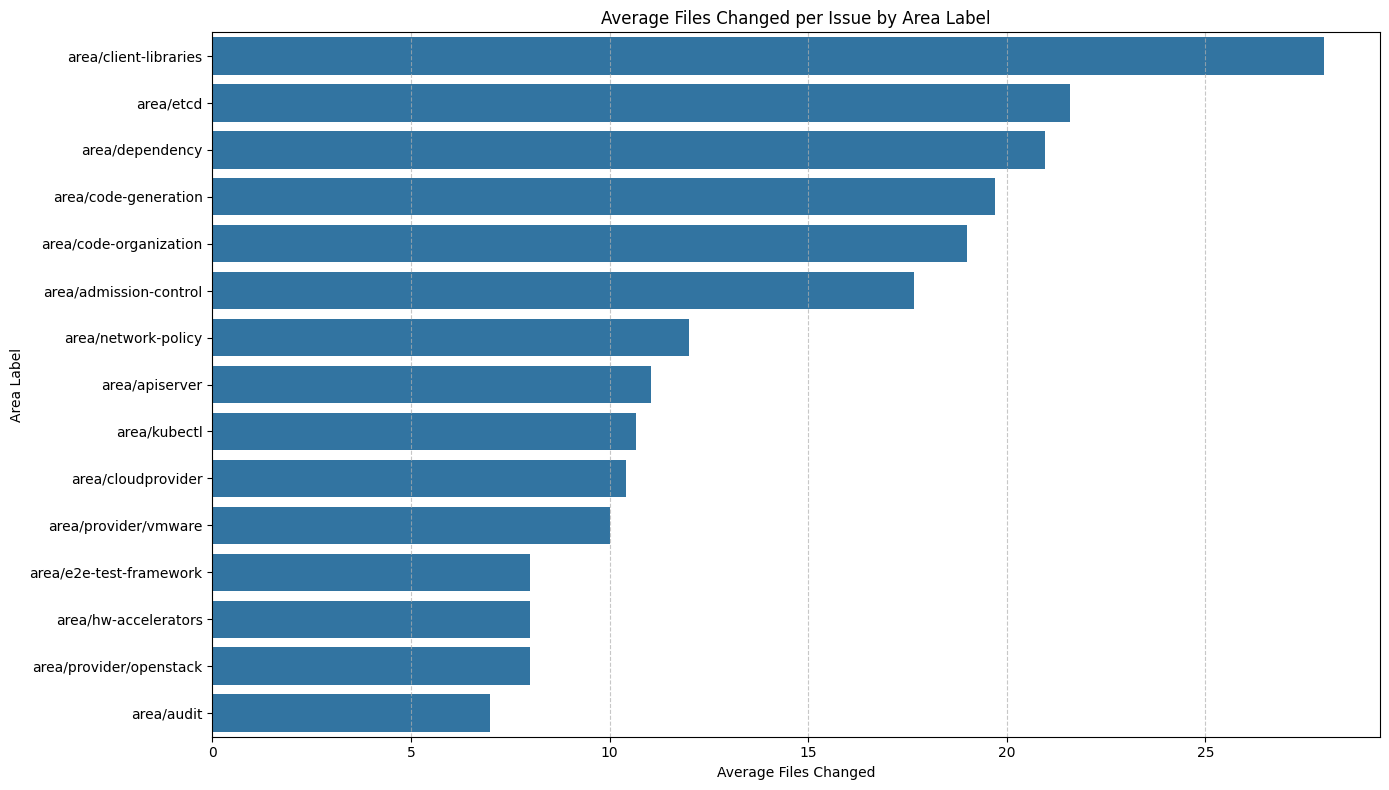

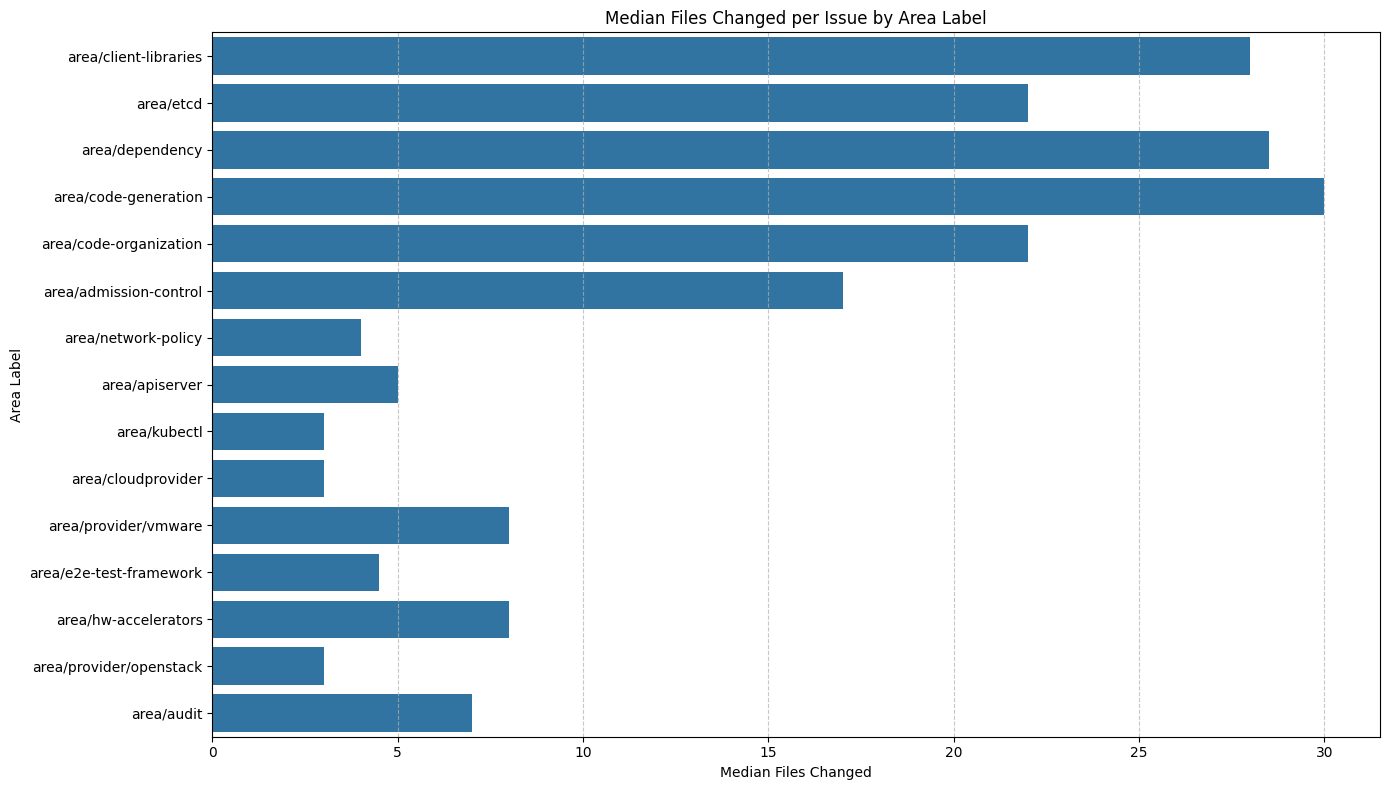

In [14]:
# Plot average files changed per area (top 15 most common areas)
plt.figure(figsize=(14, 8))
top_areas = area_files_df.head(15)  # Top 15 areas by issue count
sns.barplot(x='Avg_Files_Changed', y='Area', data=top_areas)
plt.title('Average Files Changed per Issue by Area Label')
plt.xlabel('Average Files Changed')
plt.ylabel('Area Label')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot median files changed per area (gives better insight when there are outliers)
plt.figure(figsize=(14, 8))
sns.barplot(x='Median_Files_Changed', y='Area', data=top_areas)
plt.title('Median Files Changed per Issue by Area Label')
plt.xlabel('Median Files Changed')
plt.ylabel('Area Label')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Most Frequently Changed Files
This section identifies which files are changed most frequently across all issues.

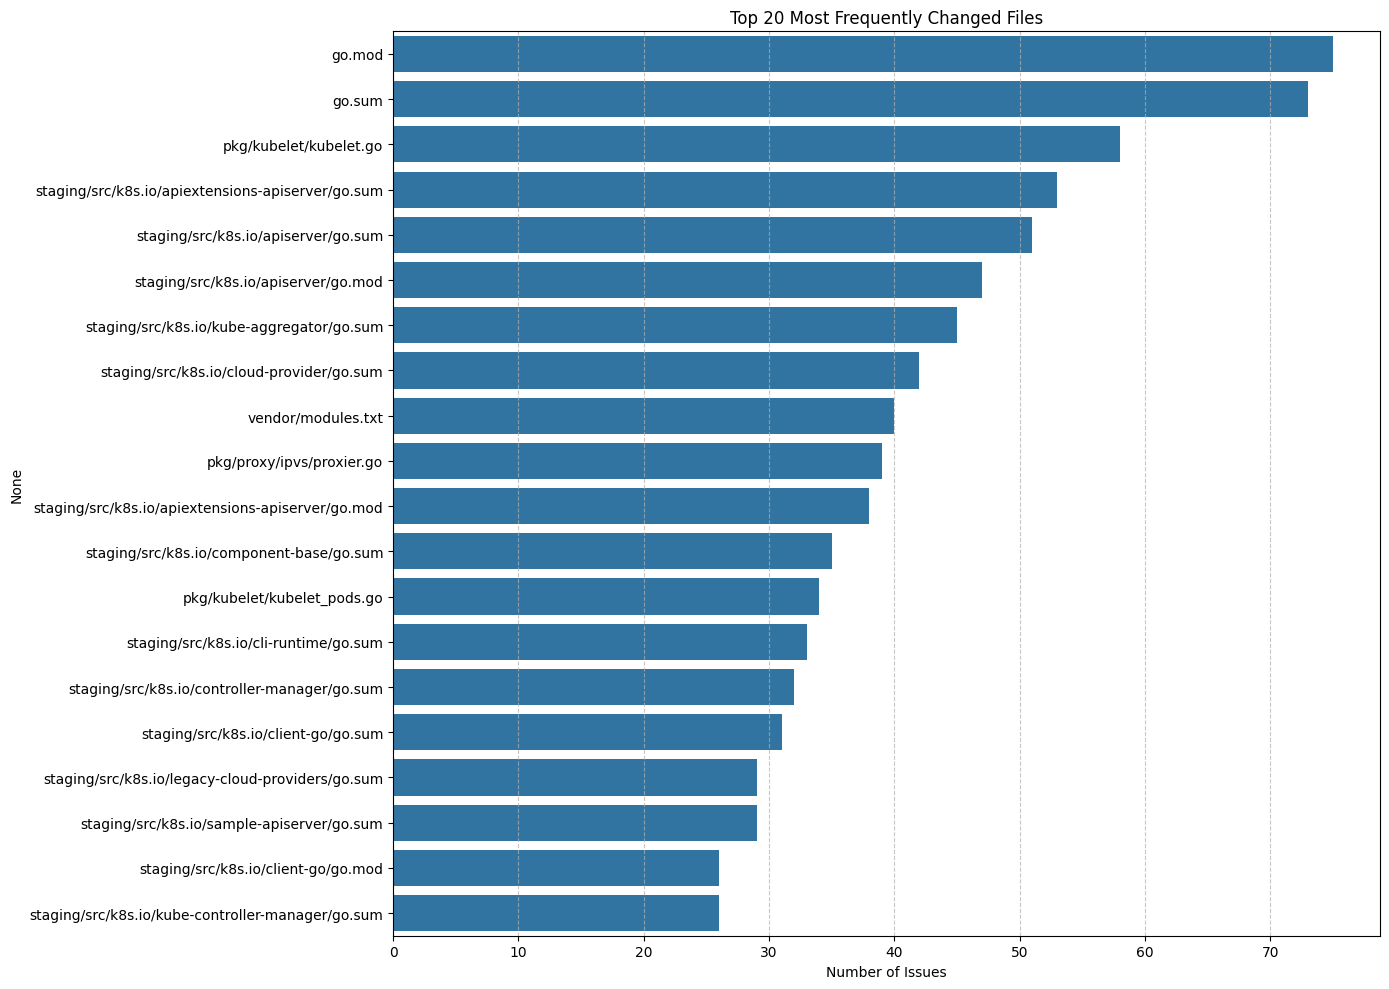


Top 20 Most Frequently Changed Files:


,File,Issue_Count,Percentage
0,go.mod,75,5.96
1,go.sum,73,5.80
2,pkg/kubelet/kubelet.go,58,4.61
3,staging/src/k8s.io/apiextensions-apiserver/go.sum,53,4.21
4,staging/src/k8s.io/apiserver/go.sum,51,4.05
5,staging/src/k8s.io/apiserver/go.mod,47,3.74
6,staging/src/k8s.io/kube-aggregator/go.sum,45,3.58
7,staging/src/k8s.io/cloud-provider/go.sum,42,3.34
8,vendor/modules.txt,40,3.18
9,pkg/proxy/ipvs/proxier.go,39,3.10


In [15]:
# Collect all file changes
all_files = []
for files in data[file_column]:
    if isinstance(files, list):
        all_files.extend(files)

# Count occurrences of each file
file_counts = pd.Series(all_files).value_counts()

# Get top files
top_files = file_counts.head(20)

# Visualize top changed files
plt.figure(figsize=(14, 10))
sns.barplot(x=top_files.values, y=top_files.index)
plt.title('Top 20 Most Frequently Changed Files')
plt.xlabel('Number of Issues')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display as a table
file_counts_df = pd.DataFrame({
    'File': top_files.index,
    'Issue_Count': top_files.values,
    'Percentage': (top_files.values / len(data) * 100).round(2)
})
print("\nTop 20 Most Frequently Changed Files:")
display(file_counts_df)

### File Changes Grouped by Number of Area Labels

This section examines how the number of files changed relates to the number of area labels per issue.

In [16]:
# Calculate number of area labels per issue
data['area_label_count'] = data['labels'].apply(
    lambda x: len([label for label in x if isinstance(label, str) and label.startswith('area/')]) 
    if isinstance(x, list) else 0
)

# Group by area label count and calculate file change statistics
area_label_stats = data.groupby('area_label_count').agg(
    issue_count=('area_label_count', 'count'),
    avg_files_changed=('files_changed_count', 'mean'),
    median_files_changed=('files_changed_count', 'median'),
    max_files_changed=('files_changed_count', 'max'),
    total_files_changed=('files_changed_count', 'sum')
).reset_index()

# Round the average for better display
area_label_stats['avg_files_changed'] = area_label_stats['avg_files_changed'].round(2)

# Display the results
print("File Changes Grouped by Number of Area Labels:")
display(area_label_stats)

File Changes Grouped by Number of Area Labels:


,area_label_count,issue_count,avg_files_changed,median_files_changed,max_files_changed,total_files_changed
0,1,894,3.50,2.0,30,3131
1,2,251,6.27,4.0,30,1575
2,3,46,11.80,7.5,30,543
3,4,22,23.00,22.0,30,506
4,5,23,28.00,30.0,30,644
5,6,10,22.90,30.0,30,229
6,7,6,20.83,30.0,30,125
7,8,1,30.00,30.0,30,30
8,9,3,21.67,30.0,30,65
9,13,2,17.00,17.0,30,34


Visualization of File Changes by Area Label Count


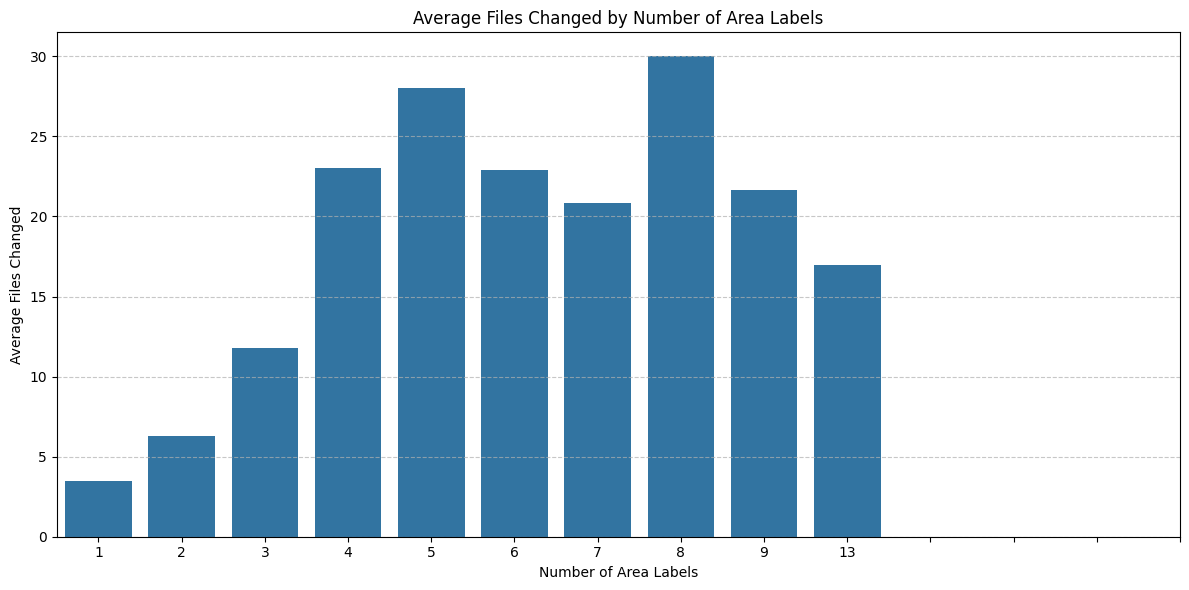

In [17]:
# Visualize average files changed per area label count
plt.figure(figsize=(12, 6))
sns.barplot(x='area_label_count', y='avg_files_changed', data=area_label_stats)
plt.title('Average Files Changed by Number of Area Labels')
plt.xlabel('Number of Area Labels')
plt.ylabel('Average Files Changed')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(area_label_stats['area_label_count'].max() + 1))
plt.tight_layout()
plt.show()

# Comments and Developer Analysis

This section analyzes the number of comments per issue and the unique developers involved in each issue.


In [ ]:
# Import required libraries for API calls
import requests
import time
from concurrent.futures import ThreadPoolExecutor, as_completed
import threading
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry
from tqdm import tqdm

# GitHub API configuration
GITHUB_TOKEN = 'token'  # Replace with your GitHub token
BASE_HEADERS = {
    'Accept': 'application/vnd.github.v3+json',
    'User-Agent': 'Research-Script'
}

if GITHUB_TOKEN:
    BASE_HEADERS['Authorization'] = f'token {GITHUB_TOKEN}'

print(f"Total records to analyze: {len(data)}")

Total records to analyze: 1258


In [19]:
# Rate limiting implementation
class RateLimiter:
    def __init__(self, max_requests_per_second=10):
        self.max_requests = max_requests_per_second
        self.tokens = max_requests_per_second
        self.updated_at = time.time()
        self.lock = threading.Lock()
    
    def acquire(self):
        with self.lock:
            now = time.time()
            elapsed = now - self.updated_at
            self.tokens = min(self.max_requests, self.tokens + elapsed * self.max_requests)
            self.updated_at = now
            
            if self.tokens >= 1:
                self.tokens -= 1
                return True
            else:
                wait_time = (1 - self.tokens) / self.max_requests
                return wait_time

rate_limiter = RateLimiter(10)

def create_session():
    """Create a session with retry strategy"""
    session = requests.Session()
    retry_strategy = Retry(
        total=3,
        backoff_factor=1,
        status_forcelist=[429, 500, 502, 503, 504],
    )
    adapter = HTTPAdapter(max_retries=retry_strategy)
    session.mount("http://", adapter)
    session.mount("https://", adapter)
    return session

In [23]:
def rate_limited_request(url, session):
    """Make a rate-limited request to GitHub API"""
    result = rate_limiter.acquire()
    if result is not True:
        time.sleep(result)
        rate_limiter.acquire()
    
    try:
        response = session.get(url, headers=BASE_HEADERS, timeout=15)
        
        if 'X-RateLimit-Remaining' in response.headers:
            remaining = int(response.headers['X-RateLimit-Remaining'])
            if remaining < 100:
                rate_limiter.max_requests = min(5, rate_limiter.max_requests)
                if remaining < 50:
                    rate_limiter.max_requests = 2
                    
            if remaining < 10:
                reset_time = int(response.headers.get('X-RateLimit-Reset', 0))
                current_time = int(time.time())
                sleep_time = max(0, reset_time - current_time + 1)
                print(f"Rate limit very low ({remaining} remaining), sleeping for {sleep_time} seconds")
                time.sleep(sleep_time)
        
        return response
    except requests.exceptions.RequestException as e:
        print(f"Request exception: {e}")
        return None

def get_comments_data(comments_url, session):
    """Fetch comments from GitHub API and extract comment statistics"""
    try:
        response = rate_limited_request(comments_url, session)
        
        if response is None:
            return {'comment_count': 0, 'unique_developers': set(), 'comments_data': []}
            
        if response.status_code == 200:
            comments = response.json()
            unique_developers = set()
            comments_data = []
            
            for comment in comments:
                user_login = comment.get('user', {}).get('login', 'Unknown')
                unique_developers.add(user_login)
                
                comments_data.append({
                    'user_login': user_login,
                    'created_at': comment.get('created_at'),
                    'body_length': len(comment.get('body', ''))
                })
            
            return {
                'comment_count': len(comments),
                'unique_developers': unique_developers,
                'comments_data': comments_data
            }
        else:
            print(f"Failed to fetch comments: {response.status_code}")
            return {'comment_count': 0, 'unique_developers': set(), 'comments_data': []}
    except Exception as e:
        print(f"Error fetching comments: {e}")
        return {'comment_count': 0, 'unique_developers': set(), 'comments_data': []}

In [24]:
def process_single_issue(args):
    """Process a single issue and return comment statistics"""
    idx, comments_url = args
    session = create_session()
    comments_result = get_comments_data(comments_url, session)
    
    return {
        'idx': idx,
        'comment_count': comments_result['comment_count'],
        'unique_developers_count': len(comments_result['unique_developers']),
        'unique_developers': list(comments_result['unique_developers']),
        'comments_data': comments_result['comments_data']
    }

# Initialize new columns for comment analysis
data['comment_count'] = 0
data['unique_developers_count'] = 0
data['unique_developers'] = None
data['comments_data'] = None

print("Processing comments for all issues (parallel processing)...")
print(f"Total records to process: {len(data)}")

if GITHUB_TOKEN:
    print("Using GitHub token for authentication")
else:
    print("WARNING: No GitHub token provided. Rate limits will be much lower")

# Create tasks for all issues
tasks = [(idx, row['comments_url']) for idx, row in data.iterrows()]

max_workers = 15 if GITHUB_TOKEN else 3
total_tasks = len(tasks)

print(f"Using {max_workers} workers with smart rate limiting")

start_time = time.time()
completed_count = 0

with ThreadPoolExecutor(max_workers=max_workers) as executor:
    futures = [executor.submit(process_single_issue, task) for task in tasks]
    
    with tqdm(total=total_tasks, desc="Processing", unit="issue") as pbar:
        for future in as_completed(futures):
            try:
                result = future.result()
                idx = result['idx']
                
                # Update the dataframe with results
                data.at[idx, 'comment_count'] = result['comment_count']
                data.at[idx, 'unique_developers_count'] = result['unique_developers_count']
                data.at[idx, 'unique_developers'] = result['unique_developers']
                data.at[idx, 'comments_data'] = result['comments_data']
                
                completed_count += 1
                pbar.update(1)
                
                if completed_count % 50 == 0:
                    elapsed = time.time() - start_time
                    rate = completed_count / elapsed
                    pbar.set_description(f"Processing ({rate:.1f} req/s)")
                
            except Exception as e:
                print(f"Error processing issue: {e}")
                pbar.update(1)

elapsed_time = time.time() - start_time
print(f"Processing completed in {elapsed_time:.1f} seconds!")
print(f"Average rate: {len(tasks)/elapsed_time:.1f} requests/second")

Processing comments for all issues (parallel processing)...
Total records to process: 1258
Using GitHub token for authentication
Using 15 workers with smart rate limiting


Processing (22.5 req/s): 100%|██████████| 1258/1258 [00:56<00:00, 22.28issue/s]

Processing completed in 56.5 seconds!
Average rate: 22.3 requests/second


### Comments Analysis Results

In [25]:
# Analyze comment statistics
print("=== COMMENTS ANALYSIS RESULTS ===\n")

# Basic statistics for comment counts
comment_stats = data['comment_count'].describe()
print("Comment Count Statistics:")
print(comment_stats)

print(f"\n=== COMMENT COUNT DISTRIBUTION ===")
print(f"Issues with 0 comments: {(data['comment_count'] == 0).sum()}")
print(f"Issues with 1-5 comments: {((data['comment_count'] >= 1) & (data['comment_count'] <= 5)).sum()}")
print(f"Issues with 6-10 comments: {((data['comment_count'] >= 6) & (data['comment_count'] <= 10)).sum()}")
print(f"Issues with 11-20 comments: {((data['comment_count'] >= 11) & (data['comment_count'] <= 20)).sum()}")
print(f"Issues with 21+ comments: {(data['comment_count'] > 20).sum()}")

# Developer involvement statistics
developer_stats = data['unique_developers_count'].describe()
print(f"\n=== DEVELOPER INVOLVEMENT STATISTICS ===")
print("Unique Developers Count Statistics:")
print(developer_stats)

print(f"\n=== DEVELOPER INVOLVEMENT DISTRIBUTION ===")
print(f"Issues with 0 developers: {(data['unique_developers_count'] == 0).sum()}")
print(f"Issues with 1 developer: {(data['unique_developers_count'] == 1).sum()}")
print(f"Issues with 2-3 developers: {((data['unique_developers_count'] >= 2) & (data['unique_developers_count'] <= 3)).sum()}")
print(f"Issues with 4-5 developers: {((data['unique_developers_count'] >= 4) & (data['unique_developers_count'] <= 5)).sum()}")
print(f"Issues with 6+ developers: {(data['unique_developers_count'] > 5).sum()}")

=== COMMENTS ANALYSIS RESULTS ===

Comment Count Statistics:
count    1258.000000
mean        8.821940
std         8.089206
min         0.000000
25%         3.000000
50%         6.000000
75%        12.000000
max        30.000000
Name: comment_count, dtype: float64

=== COMMENT COUNT DISTRIBUTION ===
Issues with 0 comments: 48
Issues with 1-5 comments: 534
Issues with 6-10 comments: 294
Issues with 11-20 comments: 235
Issues with 21+ comments: 147

=== DEVELOPER INVOLVEMENT STATISTICS ===
Unique Developers Count Statistics:
count    1258.000000
mean        4.234499
std         3.197033
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        26.000000
Name: unique_developers_count, dtype: float64

=== DEVELOPER INVOLVEMENT DISTRIBUTION ===
Issues with 0 developers: 48
Issues with 1 developer: 152
Issues with 2-3 developers: 435
Issues with 4-5 developers: 299
Issues with 6+ developers: 324


### Visualizations of Comment Analysis

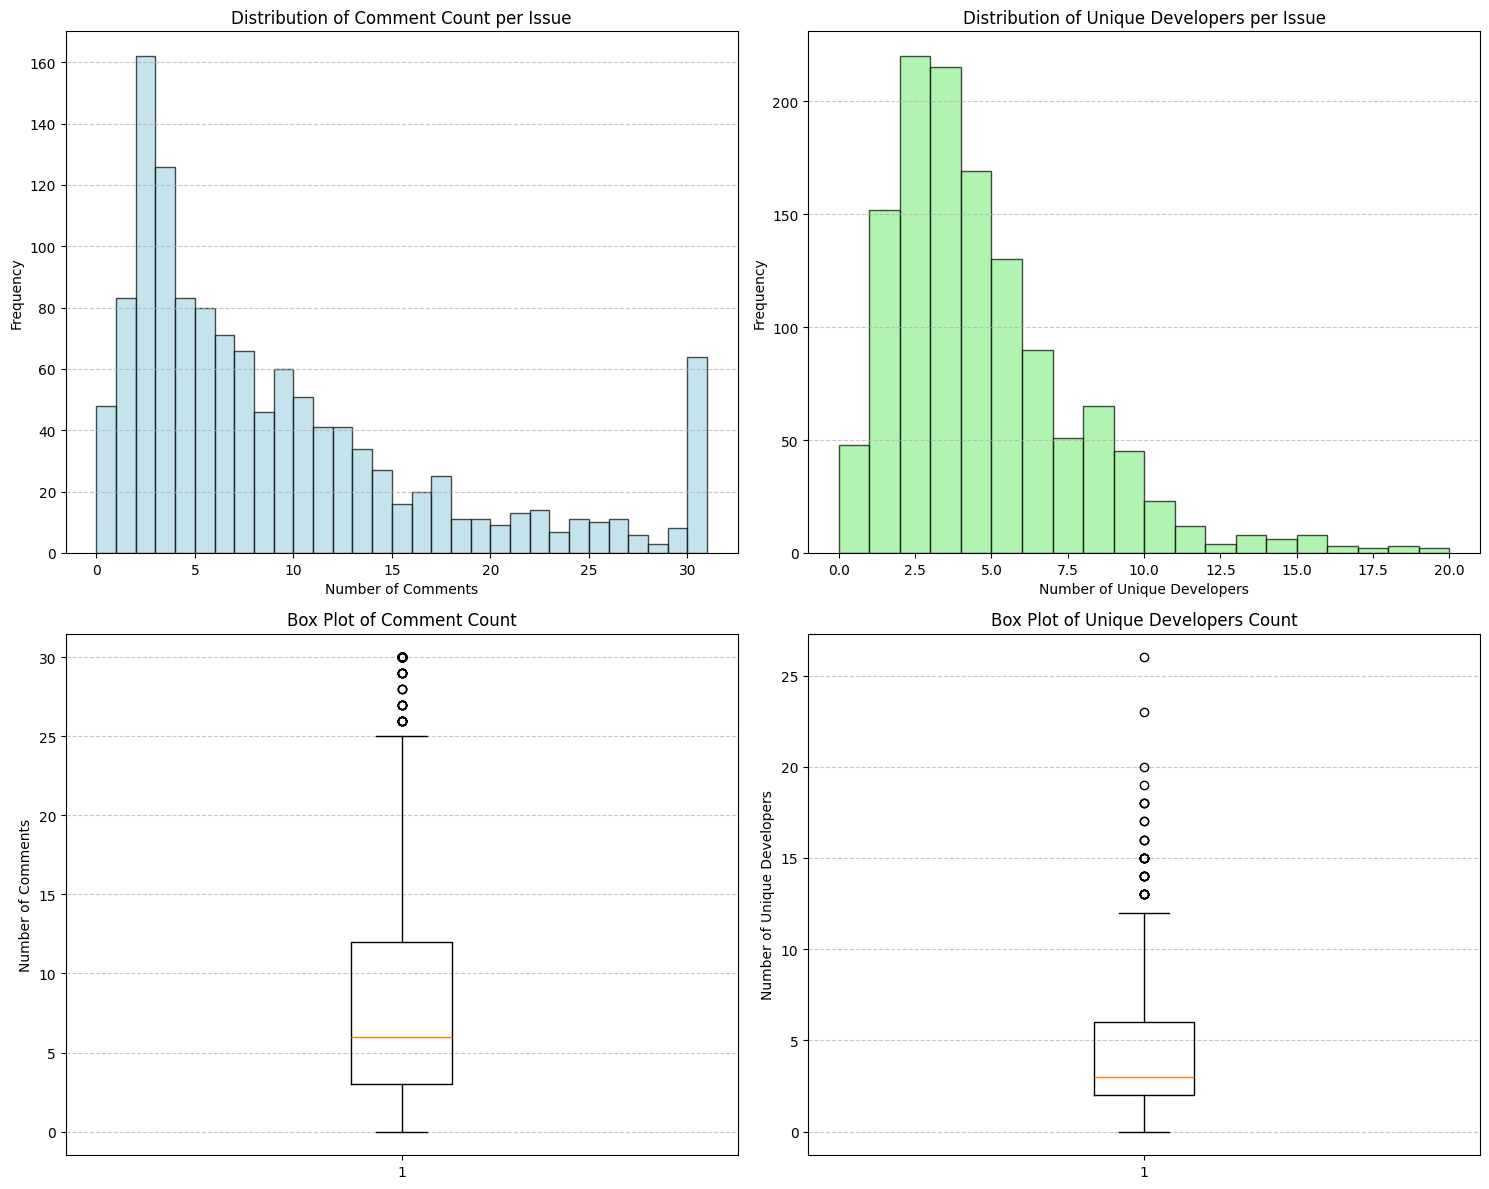


Correlation between comment count and unique developers: 0.8318


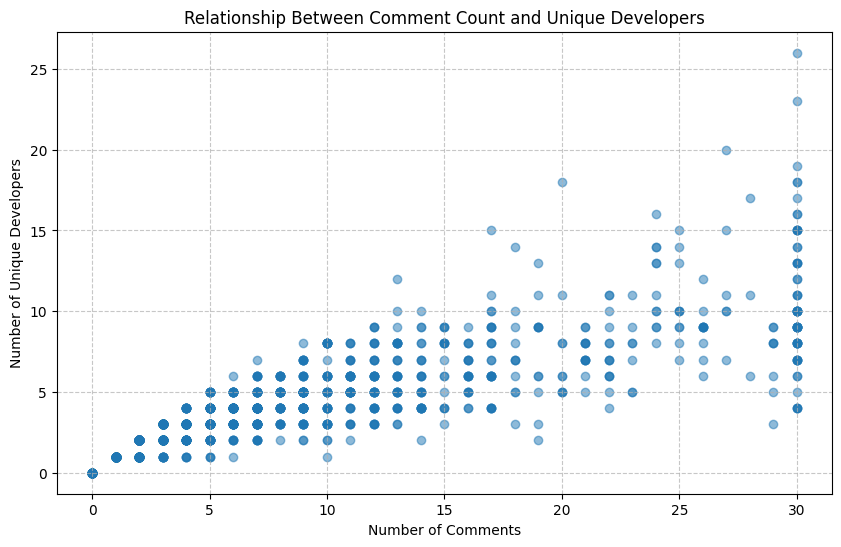

In [26]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Comment count distribution histogram
axes[0, 0].hist(data['comment_count'], bins=range(0, min(51, data['comment_count'].max() + 2)), 
                alpha=0.7, color='lightblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Comment Count per Issue')
axes[0, 0].set_xlabel('Number of Comments')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Developer count distribution histogram
axes[0, 1].hist(data['unique_developers_count'], bins=range(0, min(21, data['unique_developers_count'].max() + 2)), 
                alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Distribution of Unique Developers per Issue')
axes[0, 1].set_xlabel('Number of Unique Developers')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Box plot for comments
axes[1, 0].boxplot(data['comment_count'])
axes[1, 0].set_title('Box Plot of Comment Count')
axes[1, 0].set_ylabel('Number of Comments')
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Box plot for developers
axes[1, 1].boxplot(data['unique_developers_count'])
axes[1, 1].set_title('Box Plot of Unique Developers Count')
axes[1, 1].set_ylabel('Number of Unique Developers')
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Correlation between comments and developers
correlation = data['comment_count'].corr(data['unique_developers_count'])
print(f"\nCorrelation between comment count and unique developers: {correlation:.4f}")

# Scatter plot showing relationship
plt.figure(figsize=(10, 6))
plt.scatter(data['comment_count'], data['unique_developers_count'], alpha=0.5)
plt.title('Relationship Between Comment Count and Unique Developers')
plt.xlabel('Number of Comments')
plt.ylabel('Number of Unique Developers')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Comment Analysis Grouped by Area Labels

This section analyzes comments and developer involvement based on area labels.

In [29]:
# First, let's analyze comments by individual area labels
area_comment_stats = {}
area_developer_stats = {}

# Iterate through each issue to collect stats by area
for idx, row in data.iterrows():
    if not isinstance(row['labels'], list):
        continue
        
    # Filter for area labels (those starting with 'area/')
    area_labels = [label for label in row['labels'] if label.startswith('area/')]
    
    # If no area labels, categorize as "no-area"
    if not area_labels:
        area = "no-area"
        if area not in area_comment_stats:
            area_comment_stats[area] = []
            area_developer_stats[area] = []
        area_comment_stats[area].append(row['comment_count'])
        area_developer_stats[area].append(row['unique_developers_count'])
    else:
        # Count for each area label
        for area in area_labels:
            if area not in area_comment_stats:
                area_comment_stats[area] = []
                area_developer_stats[area] = []
            area_comment_stats[area].append(row['comment_count'])
            area_developer_stats[area].append(row['unique_developers_count'])

# Create a dataframe for area-based analysis
area_analysis_data = []
for area in area_comment_stats.keys():
    comments = area_comment_stats[area]
    developers = area_developer_stats[area]
    
    area_analysis_data.append({
        'Area': area,
        'Issue_Count': len(comments),
        'Avg_Comments': np.mean(comments),
        'Median_Comments': np.median(comments),
        'Max_Comments': max(comments) if comments else 0,
        'Total_Comments': sum(comments),
        'Avg_Developers': np.mean(developers),
        'Median_Developers': np.median(developers),
        'Max_Developers': max(developers) if developers else 0,
        'Total_Developers': sum(developers)
    })

area_analysis_df = pd.DataFrame(area_analysis_data)

# Sort by issue count (descending)
area_analysis_df = area_analysis_df.sort_values('Issue_Count', ascending=False)

# Round the averages for better display
area_analysis_df['Avg_Comments'] = area_analysis_df['Avg_Comments'].round(2)
area_analysis_df['Avg_Developers'] = area_analysis_df['Avg_Developers'].round(2)

print(f"Comment and Developer Analysis for {len(area_analysis_df)} area labels:")
display(area_analysis_df.head(20))  # Show top 20 areas

Comment and Developer Analysis for 39 area labels:


,Area,Issue_Count,Avg_Comments,Median_Comments,Max_Comments,Total_Comments,Avg_Developers,Median_Developers,Max_Developers,Total_Developers
0,area/kubelet,384,10.89,9.0,30,4182,5.12,4.0,26,1966
6,area/test,342,9.99,7.0,30,3417,4.63,4.0,23,1584
5,area/apiserver,244,9.27,7.0,30,2262,4.33,4.0,26,1057
4,area/cloudprovider,215,7.88,5.0,30,1695,3.80,3.0,26,817
9,area/kubectl,164,8.96,7.0,30,1470,4.63,4.0,26,760
3,area/dependency,94,12.97,10.5,30,1219,5.57,5.0,26,524
1,area/code-generation,73,11.44,9.0,30,835,5.51,5.0,15,402
18,area/provider/azure,67,4.30,2.0,21,288,2.10,1.0,8,141
13,area/ipvs,52,14.58,12.5,30,758,5.62,4.5,18,292
2,area/kubeadm,51,8.53,5.0,30,435,3.94,3.0,17,201


### Visualization of Comments by Area Labels

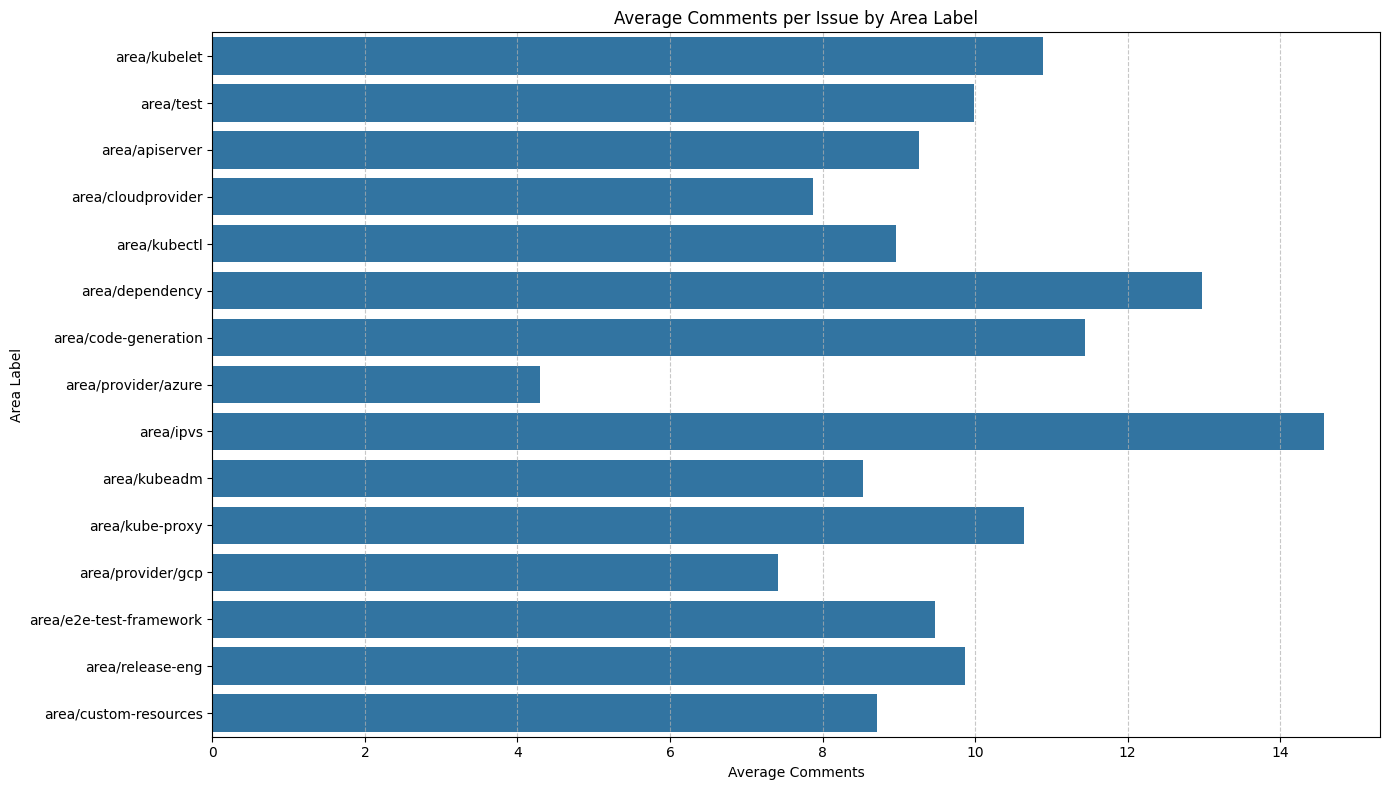

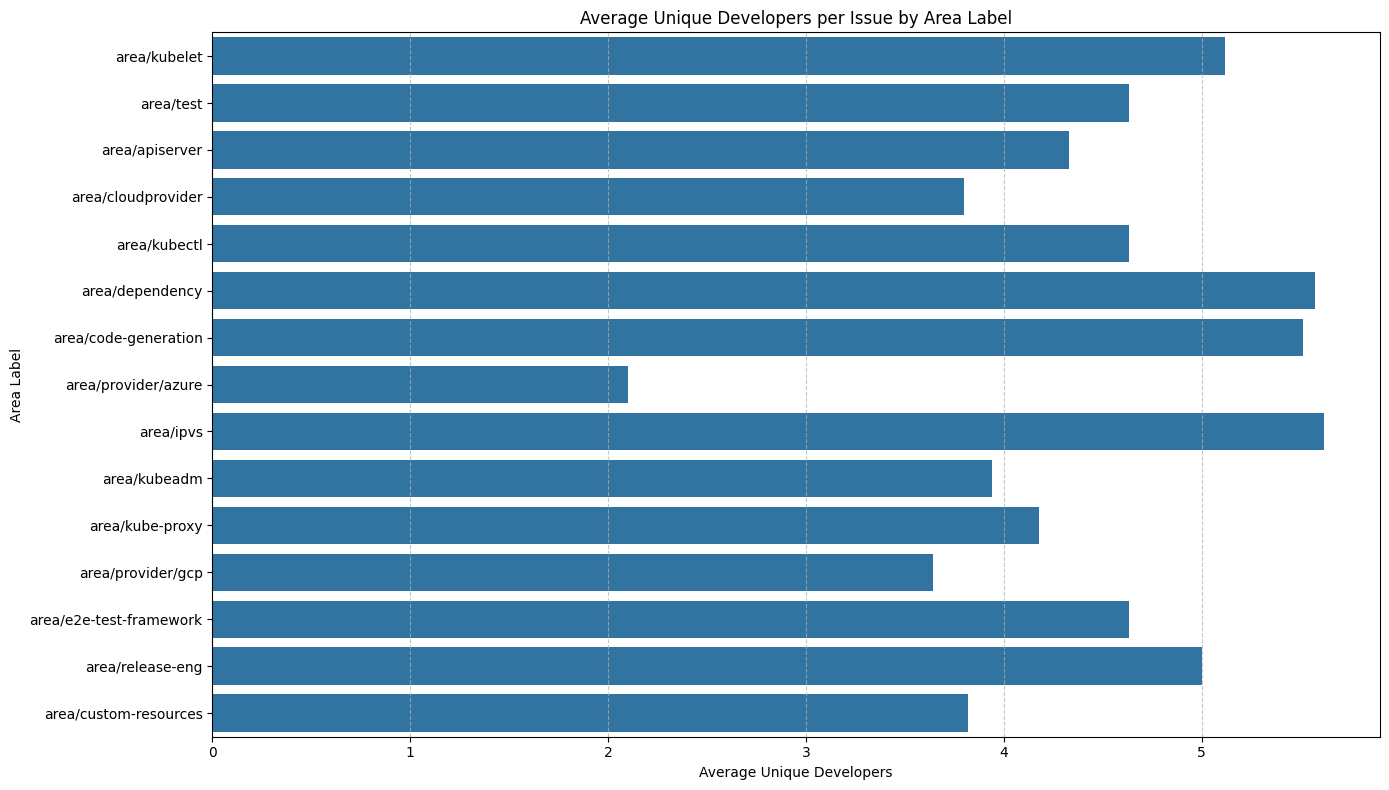

In [ ]:
# Visualize average comments per area (top 15 areas by issue count)
plt.figure(figsize=(14, 8))
top_areas_comments = area_analysis_df.head(15)
sns.barplot(x='Avg_Comments', y='Area', data=top_areas_comments)
plt.title('Average Comments per Issue by Area Label')
plt.xlabel('Average Comments')
plt.ylabel('Area Label')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualize average developers per area
plt.figure(figsize=(14, 8))
sns.barplot(x='Avg_Developers', y='Area', data=top_areas_comments)
plt.title('Average Unique Developers per Issue by Area Label')
plt.xlabel('Average Unique Developers')
plt.ylabel('Area Label')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Comments and Developers Grouped by Number of Area Labels

This section analyzes how comment activity and developer involvement change based on the number of area labels per issue.

In [31]:
# Group by number of area labels and calculate comment/developer statistics
area_label_comment_stats = data.groupby('area_label_count').agg(
    issue_count=('area_label_count', 'count'),
    avg_comments=('comment_count', 'mean'),
    median_comments=('comment_count', 'median'),
    max_comments=('comment_count', 'max'),
    total_comments=('comment_count', 'sum'),
    avg_developers=('unique_developers_count', 'mean'),
    median_developers=('unique_developers_count', 'median'),
    max_developers=('unique_developers_count', 'max'),
    total_developers=('unique_developers_count', 'sum')
).reset_index()

# Round the averages for better display
area_label_comment_stats['avg_comments'] = area_label_comment_stats['avg_comments'].round(2)
area_label_comment_stats['avg_developers'] = area_label_comment_stats['avg_developers'].round(2)

# Display the results
print("Comments and Developers Grouped by Number of Area Labels:")
display(area_label_comment_stats)

Comments and Developers Grouped by Number of Area Labels:


,area_label_count,issue_count,avg_comments,median_comments,max_comments,total_comments,avg_developers,median_developers,max_developers,total_developers
0,1,894,8.14,6.0,30,7279,4.05,3.0,20,3617
1,2,251,9.79,7.0,30,2458,4.35,4.0,23,1093
2,3,46,10.87,9.0,30,500,4.91,4.0,16,226
3,4,22,12.23,7.0,30,269,4.91,5.0,9,108
4,5,23,11.09,10.0,30,255,5.96,4.0,26,137
5,6,10,15.20,16.5,25,152,6.60,6.0,11,66
6,7,6,14.83,12.0,30,89,6.50,6.0,11,39
7,8,1,13.00,13.0,13,13,8.00,8.0,8,8
8,9,3,10.33,10.0,12,31,6.33,7.0,7,19
9,13,2,26.00,26.0,30,52,7.00,7.0,10,14


### Visualization of Comments and Developers by Area Label Count

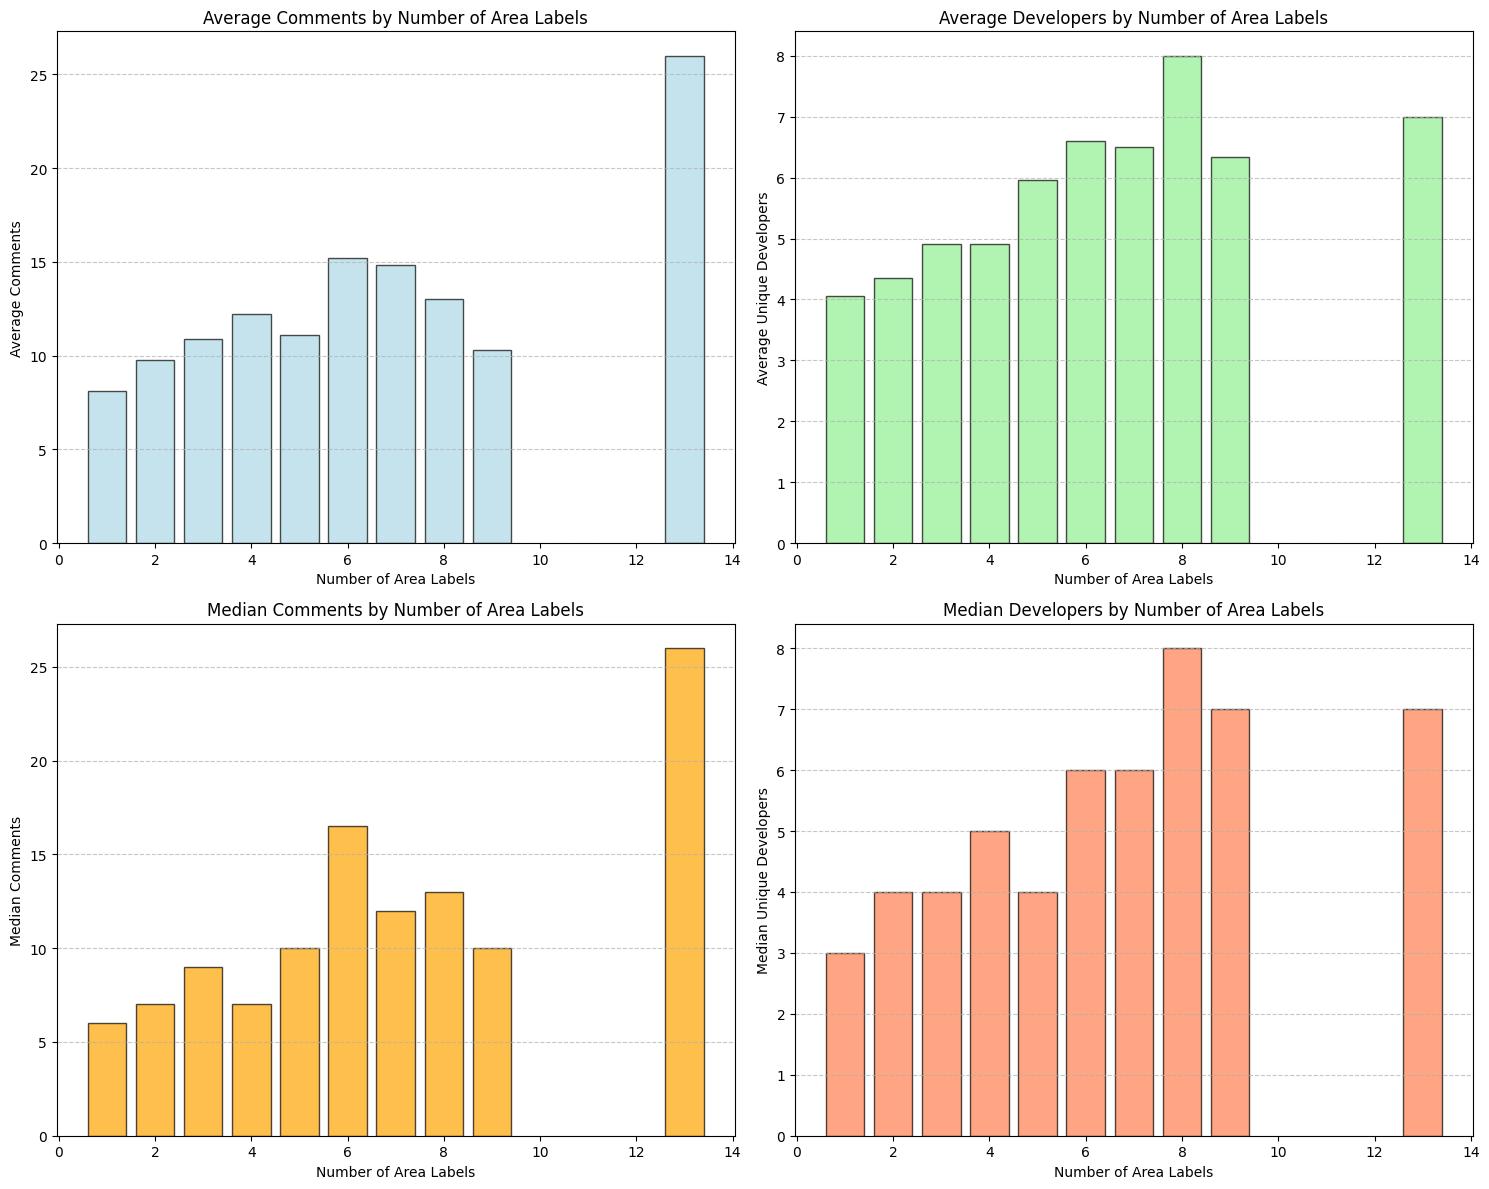

In [32]:
# Create subplots for comments and developers by area label count
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Average comments by area label count
axes[0, 0].bar(area_label_comment_stats['area_label_count'], area_label_comment_stats['avg_comments'], 
               alpha=0.7, color='lightblue', edgecolor='black')
axes[0, 0].set_title('Average Comments by Number of Area Labels')
axes[0, 0].set_xlabel('Number of Area Labels')
axes[0, 0].set_ylabel('Average Comments')
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Average developers by area label count
axes[0, 1].bar(area_label_comment_stats['area_label_count'], area_label_comment_stats['avg_developers'], 
               alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Average Developers by Number of Area Labels')
axes[0, 1].set_xlabel('Number of Area Labels')
axes[0, 1].set_ylabel('Average Unique Developers')
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Median comments by area label count
axes[1, 0].bar(area_label_comment_stats['area_label_count'], area_label_comment_stats['median_comments'], 
               alpha=0.7, color='orange', edgecolor='black')
axes[1, 0].set_title('Median Comments by Number of Area Labels')
axes[1, 0].set_xlabel('Number of Area Labels')
axes[1, 0].set_ylabel('Median Comments')
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Median developers by area label count
axes[1, 1].bar(area_label_comment_stats['area_label_count'], area_label_comment_stats['median_developers'], 
               alpha=0.7, color='coral', edgecolor='black')
axes[1, 1].set_title('Median Developers by Number of Area Labels')
axes[1, 1].set_xlabel('Number of Area Labels')
axes[1, 1].set_ylabel('Median Unique Developers')
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Top 10 Area Labels - Detailed Comparison:


,Area,Issues,Avg Comments,Avg Developers,Comments per Developer,Total Activity Score
0,area/kubelet,384,10.89,5.12,2.13,6147.84
1,area/test,342,9.99,4.63,2.16,5000.04
2,area/apiserver,244,9.27,4.33,2.14,3318.40
3,area/cloudprovider,215,7.88,3.80,2.07,2511.20
4,area/kubectl,164,8.96,4.63,1.94,2228.76
5,area/dependency,94,12.97,5.57,2.33,1742.76
6,area/code-generation,73,11.44,5.51,2.08,1237.35
7,area/provider/azure,67,4.30,2.10,2.05,428.80
8,area/ipvs,52,14.58,5.62,2.59,1050.40
9,area/kubeadm,51,8.53,3.94,2.16,635.97


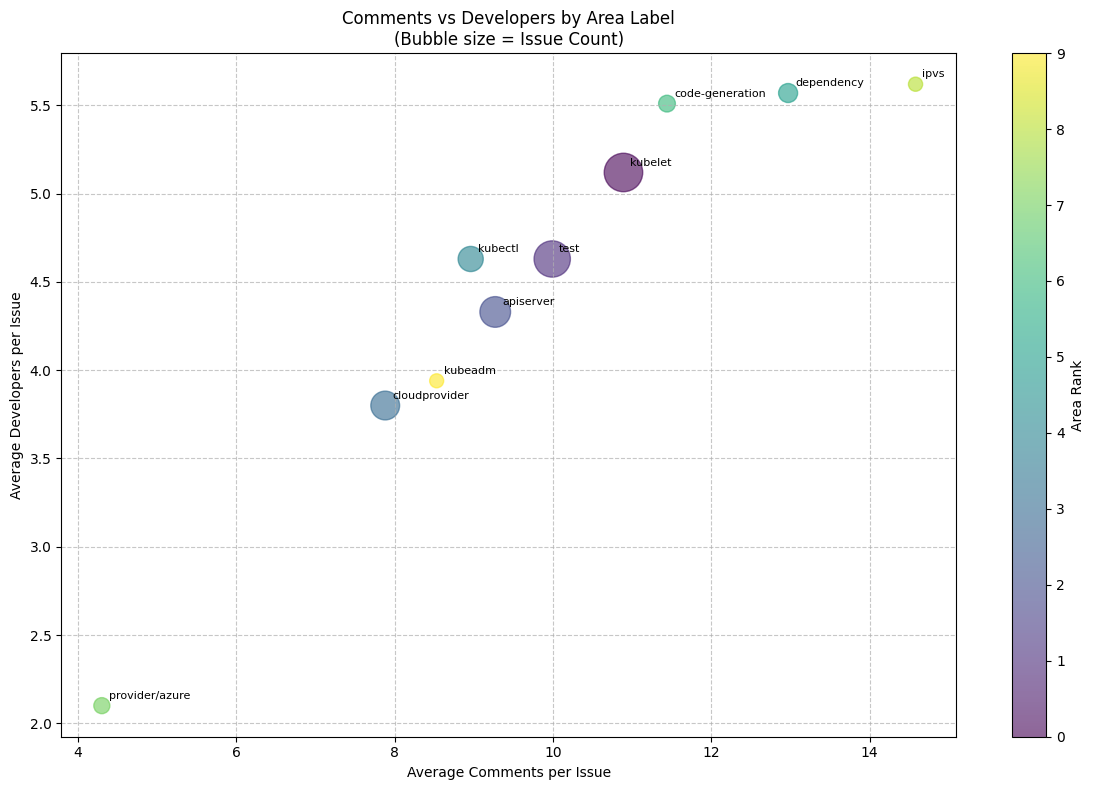

In [33]:
# Create detailed analysis for top 10 area labels by issue count
top_10_areas = area_analysis_df.head(10)

# Create comparison table
comparison_data = []
for _, row in top_10_areas.iterrows():
    area = row['Area']
    comparison_data.append({
        'Area': area,
        'Issues': row['Issue_Count'],
        'Avg Comments': row['Avg_Comments'],
        'Avg Developers': row['Avg_Developers'],
        'Comments per Developer': round(row['Avg_Comments'] / max(row['Avg_Developers'], 1), 2),
        'Total Activity Score': round((row['Avg_Comments'] + row['Avg_Developers']) * row['Issue_Count'], 2)
    })

comparison_df = pd.DataFrame(comparison_data)
print("Top 10 Area Labels - Detailed Comparison:")
display(comparison_df)

# Visualize the relationship between comments and developers for top areas
plt.figure(figsize=(12, 8))
plt.scatter(top_10_areas['Avg_Comments'], top_10_areas['Avg_Developers'], 
           s=top_10_areas['Issue_Count']*2, alpha=0.6, c=range(len(top_10_areas)), cmap='viridis')

# Add labels for each point
for idx, row in top_10_areas.iterrows():
    plt.annotate(row['Area'].replace('area/', ''), 
                (row['Avg_Comments'], row['Avg_Developers']),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.title('Comments vs Developers by Area Label\n(Bubble size = Issue Count)')
plt.xlabel('Average Comments per Issue')
plt.ylabel('Average Developers per Issue')
plt.grid(True, linestyle='--', alpha=0.7)
plt.colorbar(label='Area Rank')
plt.tight_layout()
plt.show()

### Statistical Correlations and Insights

=== STATISTICAL CORRELATIONS ===

Correlation between number of area labels and comment count: 0.1603
Correlation between number of area labels and unique developers: 0.1379


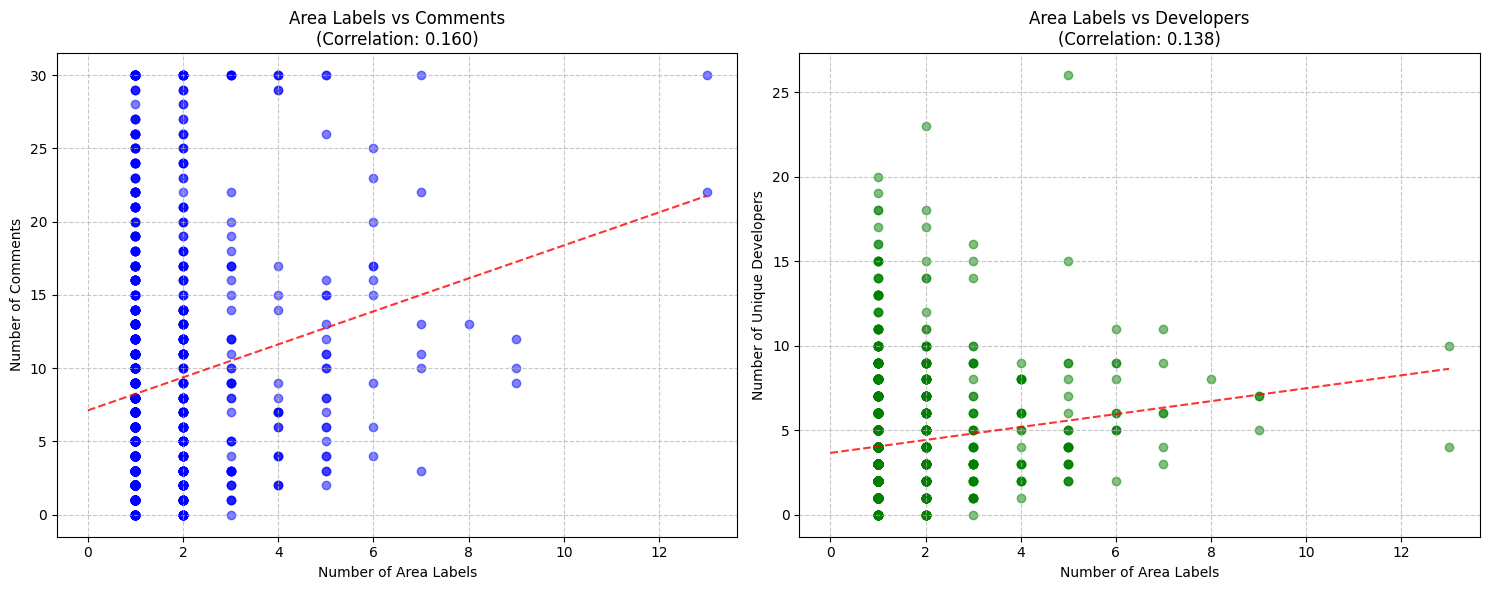


=== KEY INSIGHTS ===
• Issues with more area labels tend to have more comment activity
• Issues with more area labels tend to have more developer involvement
• Most active area (by issue count): area/kubelet
• Area with highest avg comments: area/platform/gce (30.0 comments)
• Area with highest avg developers: area/platform/gce (9.0 developers)


In [34]:
# Calculate correlations
print("=== STATISTICAL CORRELATIONS ===\n")

# Correlation between area label count and comment activity
area_comment_corr = data['area_label_count'].corr(data['comment_count'])
print(f"Correlation between number of area labels and comment count: {area_comment_corr:.4f}")

# Correlation between area label count and developer involvement
area_dev_corr = data['area_label_count'].corr(data['unique_developers_count'])
print(f"Correlation between number of area labels and unique developers: {area_dev_corr:.4f}")

# Create scatter plots to visualize these relationships
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Area labels vs Comments
axes[0].scatter(data['area_label_count'], data['comment_count'], alpha=0.5, color='blue')
axes[0].set_title(f'Area Labels vs Comments\n(Correlation: {area_comment_corr:.3f})')
axes[0].set_xlabel('Number of Area Labels')
axes[0].set_ylabel('Number of Comments')
axes[0].grid(True, linestyle='--', alpha=0.7)

# Add trend line
z = np.polyfit(data['area_label_count'], data['comment_count'], 1)
p = np.poly1d(z)
axes[0].plot(range(0, data['area_label_count'].max() + 1), 
            p(range(0, data['area_label_count'].max() + 1)), "r--", alpha=0.8)

# Area labels vs Developers
axes[1].scatter(data['area_label_count'], data['unique_developers_count'], alpha=0.5, color='green')
axes[1].set_title(f'Area Labels vs Developers\n(Correlation: {area_dev_corr:.3f})')
axes[1].set_xlabel('Number of Area Labels')
axes[1].set_ylabel('Number of Unique Developers')
axes[1].grid(True, linestyle='--', alpha=0.7)

# Add trend line
z2 = np.polyfit(data['area_label_count'], data['unique_developers_count'], 1)
p2 = np.poly1d(z2)
axes[1].plot(range(0, data['area_label_count'].max() + 1), 
            p2(range(0, data['area_label_count'].max() + 1)), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

# Summary insights
print(f"\n=== KEY INSIGHTS ===")
print(f"• Issues with more area labels tend to have {'more' if area_comment_corr > 0.1 else 'similar levels of'} comment activity")
print(f"• Issues with more area labels tend to have {'more' if area_dev_corr > 0.1 else 'similar levels of'} developer involvement")
print(f"• Most active area (by issue count): {area_analysis_df.iloc[0]['Area']}")
print(f"• Area with highest avg comments: {area_analysis_df.loc[area_analysis_df['Avg_Comments'].idxmax()]['Area']} ({area_analysis_df['Avg_Comments'].max():.1f} comments)")
print(f"• Area with highest avg developers: {area_analysis_df.loc[area_analysis_df['Avg_Developers'].idxmax()]['Area']} ({area_analysis_df['Avg_Developers'].max():.1f} developers)")
